In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DRIVE_DATA_DIR = '/content/drive/MyDrive/fourth_brain/projects/data/CMAPSSData_small/'
X_train = pd.read_csv(DRIVE_DATA_DIR + 'train_FD001.txt', sep=' ', header=None)
Y_test = pd.read_csv(DRIVE_DATA_DIR + 'RUL_FD001.txt', usecols=[0], header=None)

# generate column names
cols = (['unit_number', 'time'] 
        + [f'op_setting_{i+1}' for i in range(3)]
        + [f'sensor_{i+1}' for i in range(X_train.shape[1] - 5)])

X_train.columns = cols
X_train.head()

,unit_number,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [4]:
Y_test.head()

,0
0,112
1,98
2,69
3,82
4,91


In [5]:
X_train[X_train['unit_number'] == 2]['time'].nunique()

287

In [6]:
X_train['unit_number'].nunique()

100

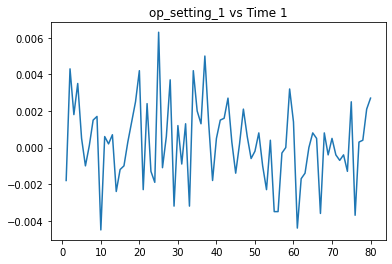

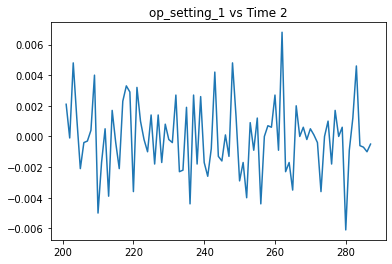

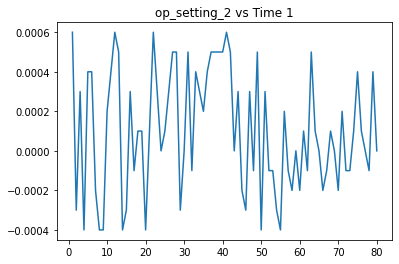

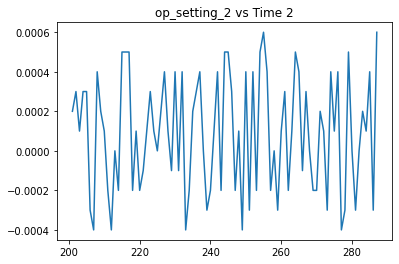

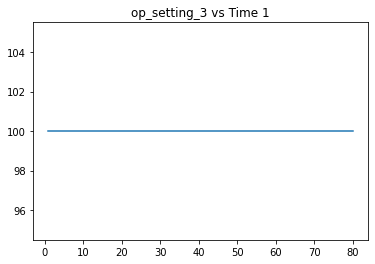

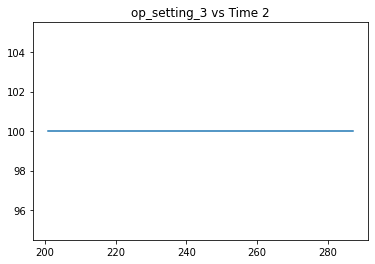

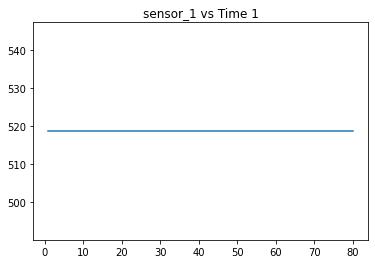

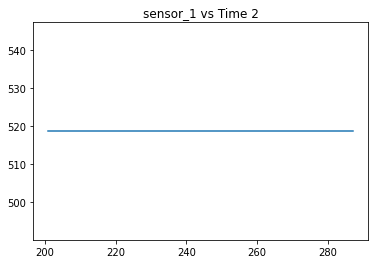

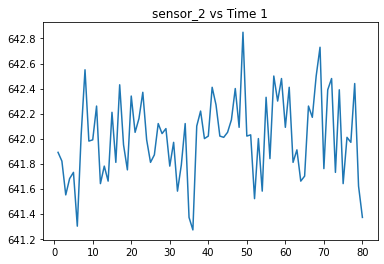

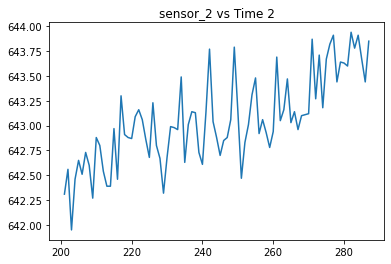

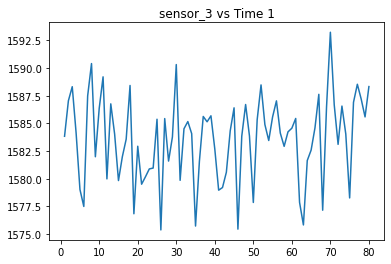

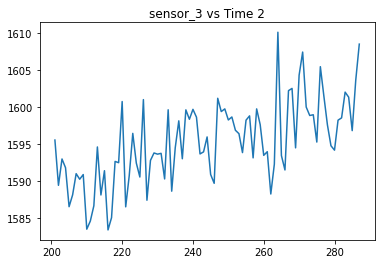

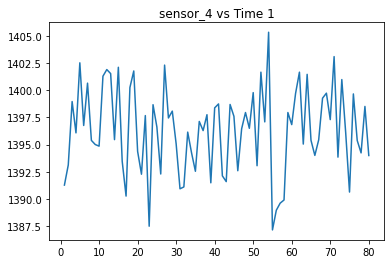

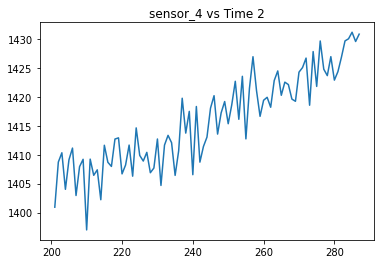

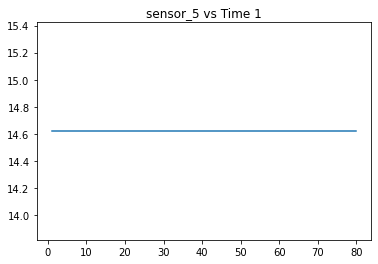

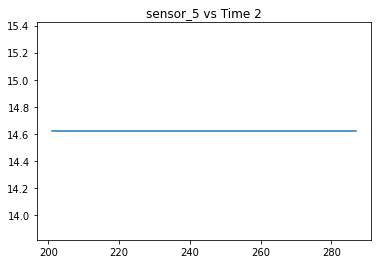

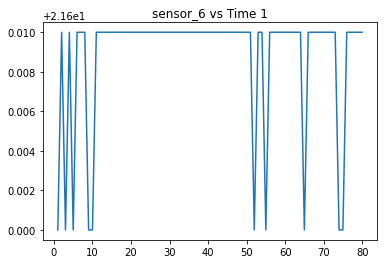

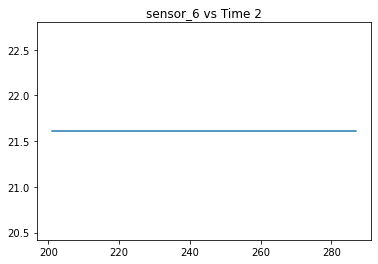

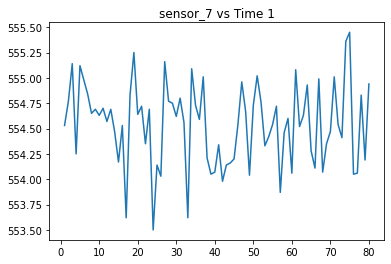

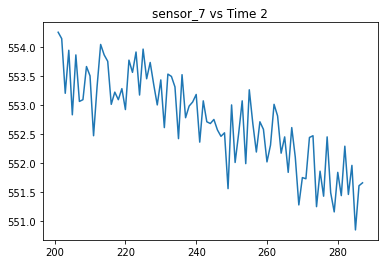

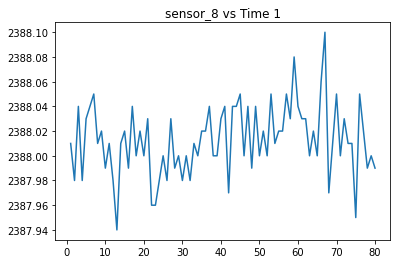

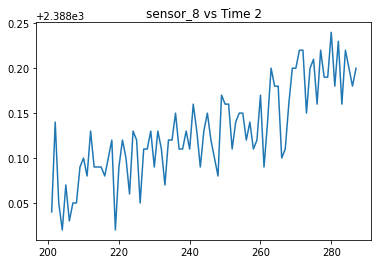

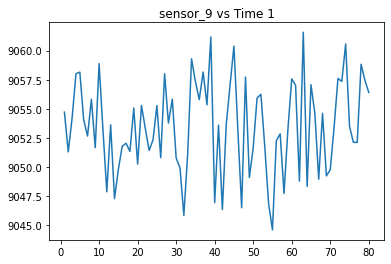

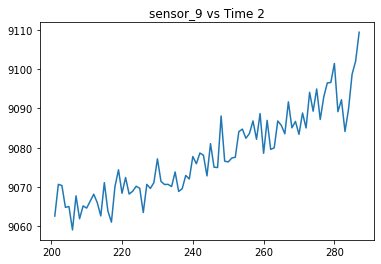

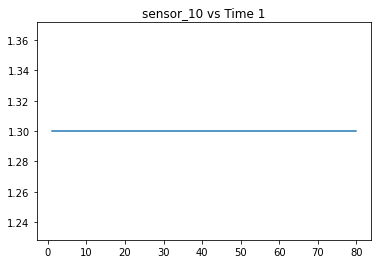

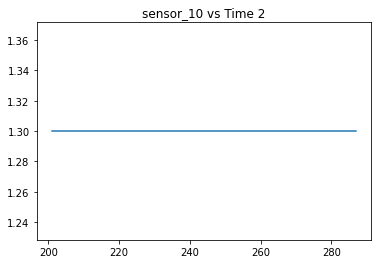

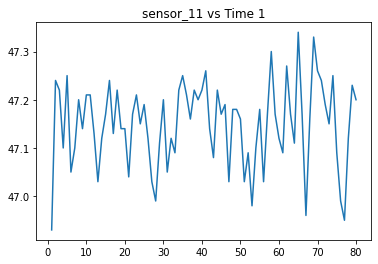

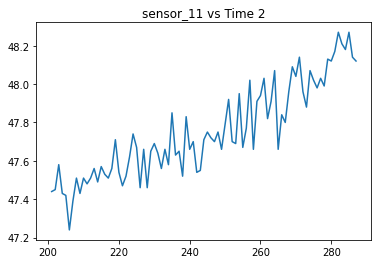

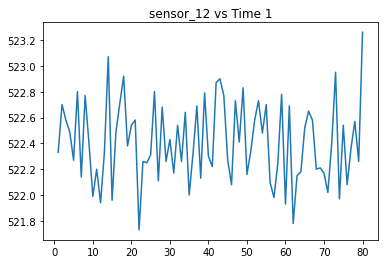

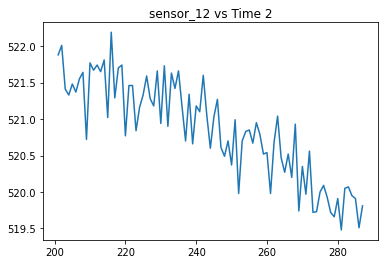

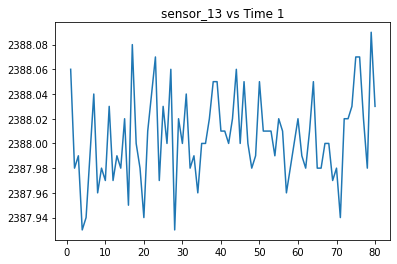

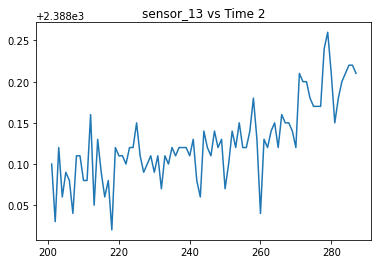

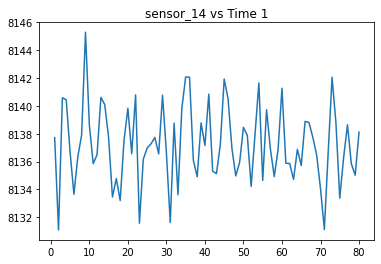

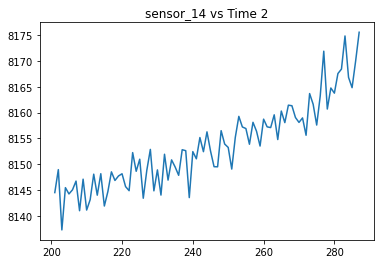

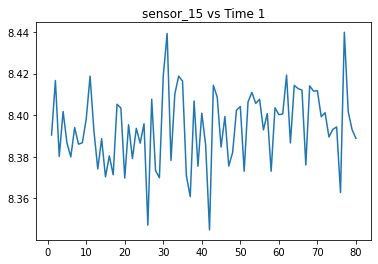

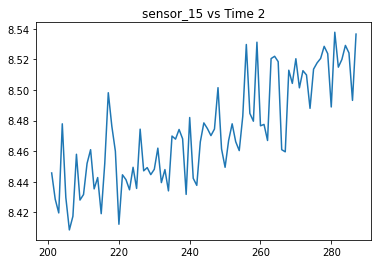

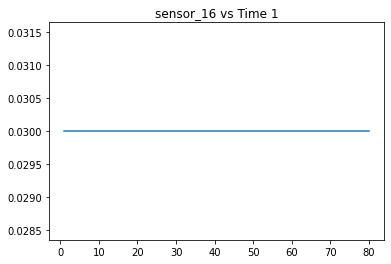

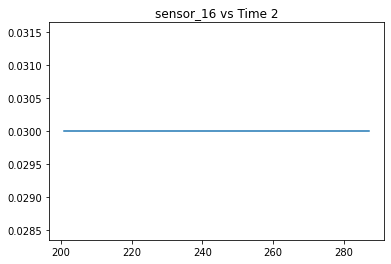

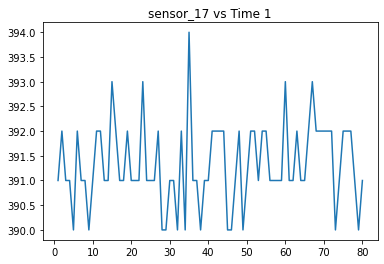

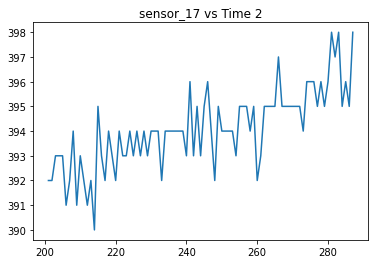

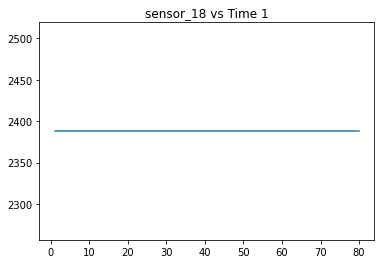

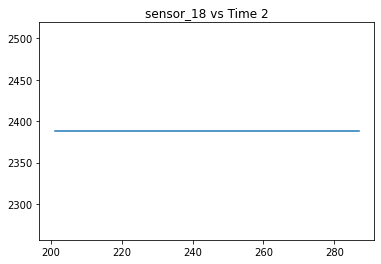

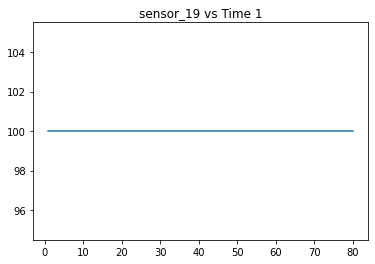

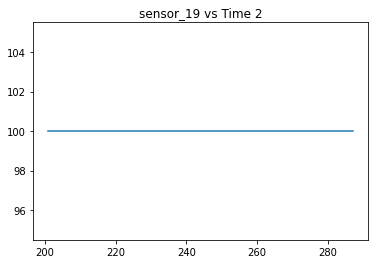

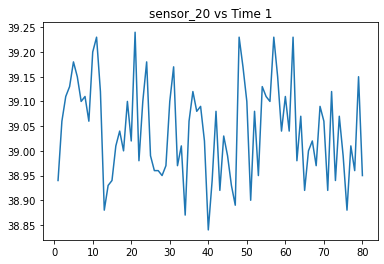

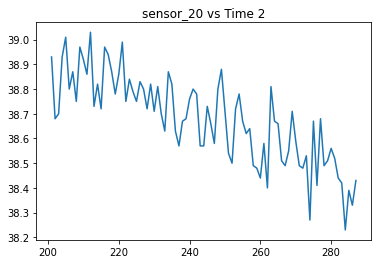

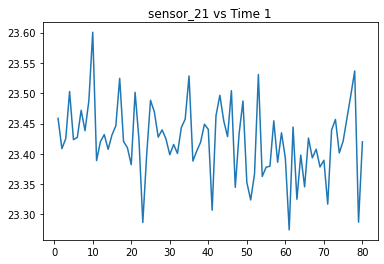

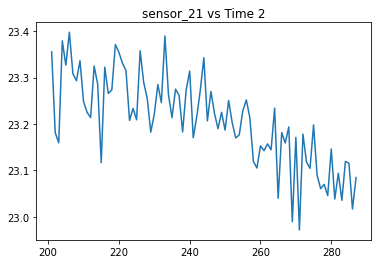

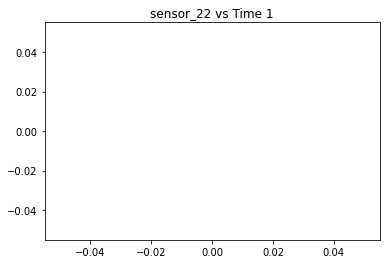

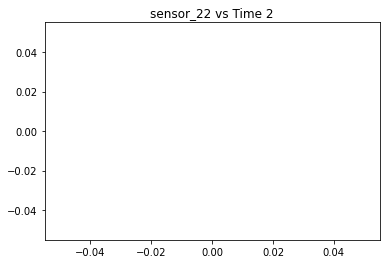

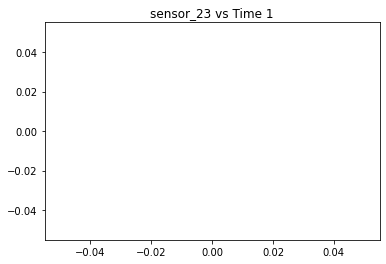

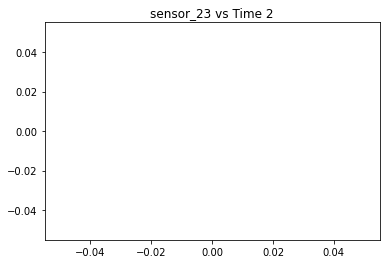

In [7]:
for col in X_train.columns.tolist():
    if col not in ('time', 'unit_number'):
        plt.plot(X_train[X_train['unit_number'] == 2]['time'][:80], X_train[X_train['unit_number'] == 2][col][:80])
        plt.title(f'{col} vs Time 1')
        plt.show()
        plt.plot(X_train[X_train['unit_number'] == 2]['time'][200:], X_train[X_train['unit_number'] == 2][col][200:])
        plt.title(f'{col} vs Time 2')
        plt.show()

# Note
- first 80 cycles have pretty regular patterns in most of the sensor signals
- the last 80-100 cycles before the failure mode is reached deviate from the regular signals observed early on (this is probably an indication that an engine is reaching its failure mode and is the sort of signal our models will have to capture to estimate remaining useful life)

In [8]:
X_train.groupby('unit_number').size().to_frame('RUL_from_cycle1').sort_values(by='RUL_from_cycle1', ascending=False)

,RUL_from_cycle1
unit_number,
69,362
92,341
96,336
67,313
83,293
...,...
24,147
57,137
70,137


- assuming we have sensor readings until a failure mode is reached, the **remaining useful life** (RUL) is just the count of rows in the data set for each engine (unit_number)